# One-vs-all Classification with Logisitic Regression

Week4のMulti-class Classificationの課題について

In [1]:
import math, random
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_style('whitegrid')

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

default_figsize = plt.rcParams['figure.figsize']

## Dataset

In [2]:
dataset = scipy.io.loadmat('ex3data1.mat')
xs = dataset['X'].tolist()
ys = dataset['y'].ravel().tolist()
ys = [0 if y == 10 else y for y in ys]
train_frame = pd.DataFrame(data={'image':xs, 'label':ys})

In [3]:
# ランダムに抽出して表示
ixs = sorted(np.random.randint(0, len(train_frame['label']), 20))
train_frame.take(ixs)

,image,label
36,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
194,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
682,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
885,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
965,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1572,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2126,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2168,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2553,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
2915,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5


## Visualizing the dataset

In [4]:
def display_data(images, labels):
    m = len(labels)
    rows = math.floor(math.sqrt(m))
    columns = math.ceil(m / rows)

    fig = plt.figure()
    fig.subplots_adjust(hspace=0.7)

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            ax = fig.add_subplot(rows, columns, index+1)
            ax.axis('off')
            ax.set_title(labels[index])
            ax.imshow(np.array(images[index]).reshape(20,20).T,
                      cmap=plt.get_cmap('gray'))

saved assets/week04_dataset.png


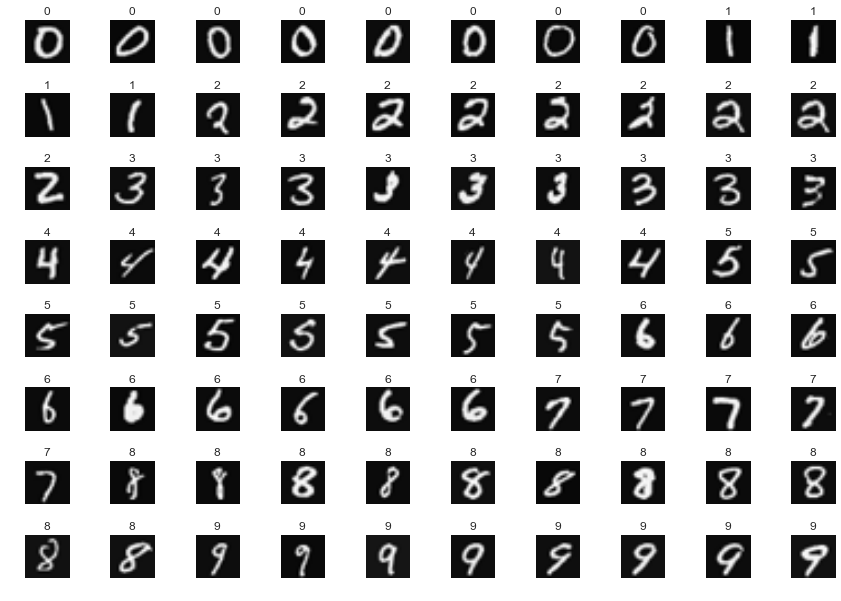

In [5]:
# ランダムに抽出して表示
ixs = sorted(np.random.randint(0, len(train_frame['label']), 80))
df = train_frame.take(ixs)
images = df['image'].values
labels = df['label'].values

plt.rcParams['figure.figsize'] = (15, 10)
display_data(images, labels)
savefig('week04_dataset.png')

## Classification

In [6]:
%run 'lr_classifier.py'

In [7]:
X = np.array(train_frame['image'].values.tolist())
y = np.array(train_frame['label'].values.tolist()).reshape(-1, 1)

thetas, J_history = optimize_params(X, y, 10, 0.1)

training : label=0 J=0.0176975150628
training : label=1 J=0.0248629712402
training : label=2 J=0.0693398270257
training : label=3 J=0.0725531401349
training : label=4 J=0.0512103972198
training : label=5 J=0.0774043411784
training : label=6 J=0.0336919652133
training : label=7 J=0.0461226952037
training : label=8 J=0.0941572604235
training : label=9 J=0.0888868570956


saved assets/week04_lr_cost_history.png


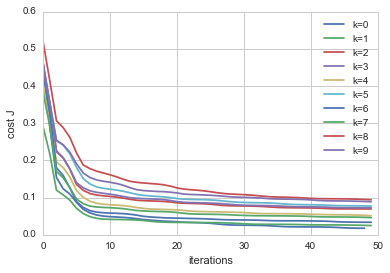

In [8]:
plt.rcParams['figure.figsize'] = default_figsize

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for label, j in sorted(J_history.items()):
    ax.plot(j, label='k='+label)
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')
savefig('week04_lr_cost_history.png')

## Prediction

In [9]:
preds = predict(thetas, X)
pred_classes = np.array([p['class'] for p in preds]).reshape(-1, 1)
pred_values = np.array([p['values'] for p in preds]).reshape(pred_classes.shape[0], -1)
pred_max_values = np.array([max(p) for p in pred_values]).reshape(-1, 1)

compute_train_accuracy(pred_classes, y)

93.280000000000001

## Visualize prediction errors

In [10]:
pred_frame = train_frame.copy()
pred_frame['class'] = pred_classes
pred_frame['value'] = pred_max_values

correct_frame = pred_frame[pred_frame['label'] == pred_frame['class']]
mistake_frame = pred_frame[pred_frame['label'] != pred_frame['class']]

In [11]:
# ランダムに抽出して表示
ixs = sorted(np.random.randint(0, len(mistake_frame['label']), 10))
mistake_frame.take(ixs)

,image,label,class,value
286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,6,0.284589
521,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,5,0.383297
1413,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4,0.897474
1476,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,7,0.603584
1766,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,5,0.522879
2112,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,1,0.995127
2616,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,8,0.763564
3563,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,9,0.651760
4865,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,8,0.606727
4902,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,4,0.084876


saved assets/week04_lr_mistakes.png


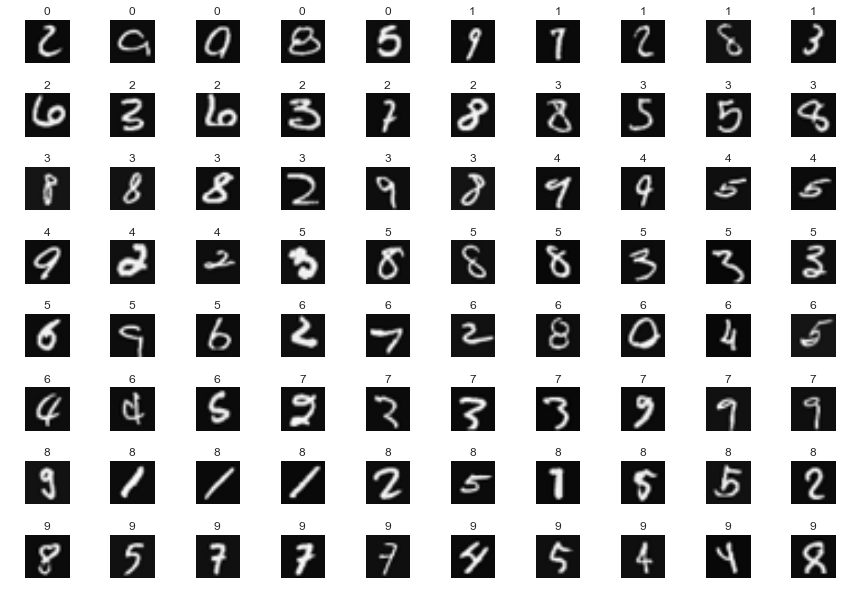

In [12]:
# ランダムに抽出して表示
ixs = sorted(np.random.permutation(mistake_frame.index)[0:80])
df = mistake_frame.ix[ixs].sort_values('class')
images = df['image'].values
labels = df['class'].ravel().tolist()

plt.rcParams['figure.figsize'] = (15, 10)
display_data(images, labels)
savefig('week04_lr_mistakes.png')

## Memo...

saved assets/week04_nn_pred_hist.png


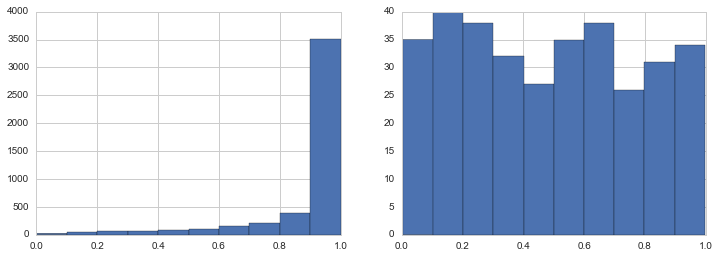

In [13]:
df = pd.DataFrame(data=preds)
plt.rcParams['figure.figsize'] = (12, 4)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(correct_frame['value'])
ax = fig.add_subplot(1,2,2)
ax.hist(mistake_frame['value'])
savefig('week04_nn_pred_hist.png')

In [14]:
df = train_frame.copy()
df['class'] = pred_classes

cols = ["pv" + str(k) for k in range(10)]
df = pd.concat([df, pd.DataFrame(data=pred_values, columns=cols)], axis=1)
df[df['label'] != df['class']].sort_values('class').head(5)

,image,label,class,pv0,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9
1494,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,0.448971,6.530776e-13,0.102467,0.023837,2.181835e-09,2.352016e-03,1.561123e-08,1.282011e-05,0.002438,2.601735e-08
2920,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,0.262333,6.329248e-13,0.000004,0.000036,1.079819e-04,2.648102e-03,5.211648e-09,5.355499e-09,0.069279,1.633892e-04
2788,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,0.822684,3.818761e-08,0.558502,0.289181,1.815879e-09,6.116794e-02,3.243040e-07,1.959507e-05,0.004150,5.831480e-10
4593,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,0,0.425127,1.630855e-12,0.083362,0.000021,3.539280e-05,3.109389e-02,1.120473e-05,6.643839e-05,0.000009,3.853545e-05
3043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,0,0.670947,2.316678e-14,0.159387,0.000002,4.760694e-09,3.806281e-07,1.089427e-01,6.886017e-05,0.000091,3.055573e-07
